In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from netCDF4 import Dataset as NetCDFFile
from mpl_toolkits.basemap import Basemap, cm
import networkx as nx

In [2]:
# data
code=pd.read_csv('airport_code.csv')
fre=pd.read_csv('airport_frequencies.csv')

In [10]:
code.shape

(58505, 14)

In [9]:
code.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,00AA
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,00AL
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN


In [14]:
code.type.value_counts()

small_airport     35092
heliport          12392
closed             4813
medium_airport     4539
seaplane_base      1031
large_airport       613
balloonport          25
Name: type, dtype: int64

In [11]:
fre.shape

(28921, 6)

In [5]:
fre.head()

,id,airport_ref,ident,type,description,frequency_mhz
0,70518,6528,00CA,CTAF,CTAF,122.9
1,307581,6589,01FL,ARCAL,NaN,122.9
2,75239,6589,01FL,CTAF,CEDAR KNOLL TRAFFIC,122.8
3,60191,6756,04CA,CTAF,CTAF,122.9
4,59287,6779,04MS,UNIC,UNICOM,122.8


# Aeropuertos

In [15]:
airports_large = code[code.type == "large_airport"]

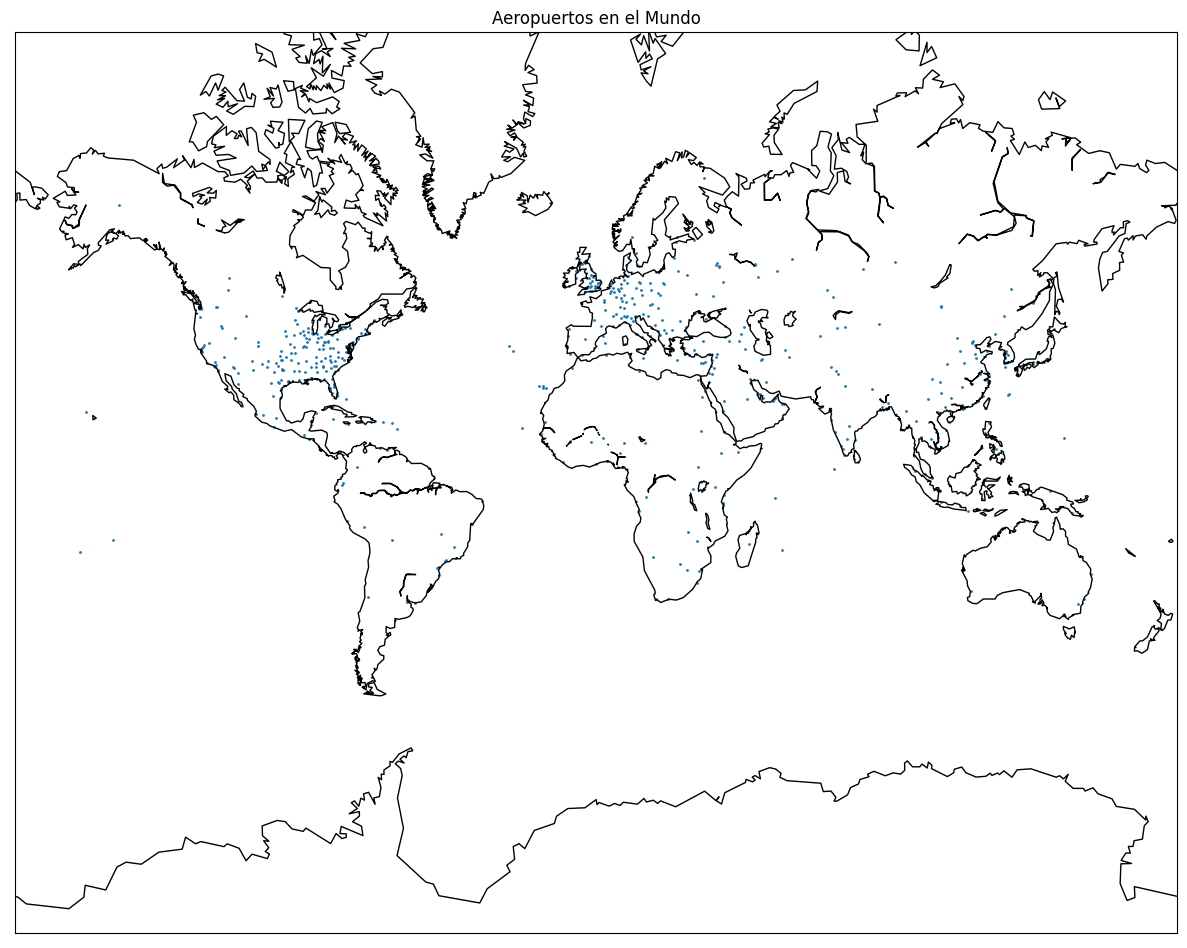

In [16]:
longitudes = airports_large["longitude_deg"].tolist()
latitudes = airports_large["latitude_deg"].tolist()
fig, ax = plt.subplots(figsize=(15,20))
plt.title("Aeropuertos en el Mundo")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, 
            llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

# Aeropuertos y vuelos

In [22]:
airport_us = airports_large[(airports_large.iso_country == "US")][['name','latitude_deg', 'longitude_deg', 'ident', 'gps_code', 'local_code']]
		

In [23]:
us_airport_ix = airport_us.index.values

In [24]:
routes_us = fre[(fre['ident'].isin(us_airport_ix)) &
		            (fre['ident'].isin(us_airport_ix))] #extract routes that flyies from AND to USA		

In [ ]:
routes_us =  pd.DataFrame(fre.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))		

In [ ]:
# to find number of flights in and out of an airport
		# it is similar to find number of rows in which each airport occur in either one of the 2 columns
		counts = routes_us['Source Airport'].append(routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
		# create a data frame of position based on names in count
		counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
		pos_data = counts.merge(airport_us, on = 'IATA')

		# Create graph
		graph = nx.from_pandas_edgelist(routes_us, source = 'Source Airport', target = 'Dest Airport',
		                        edge_attr = 'counts',create_using = nx.DiGraph())

		# default graph using Networkx inbuilt graph tools
		plt.figure(figsize = (10,9))
		nx.draw_networkx(graph)
		plt.savefig("./images/networkx_basemap/map_0.png", format = "png", dpi = 300)
		plt.show()

In [3]:
code1=code[code['iso_country']=='US']
newdata = code1.iloc[0:1500, [3,4,5]]
newdata=pd.DataFrame(newdata)
result = pd.merge(code,fre,on='ident')

In [9]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

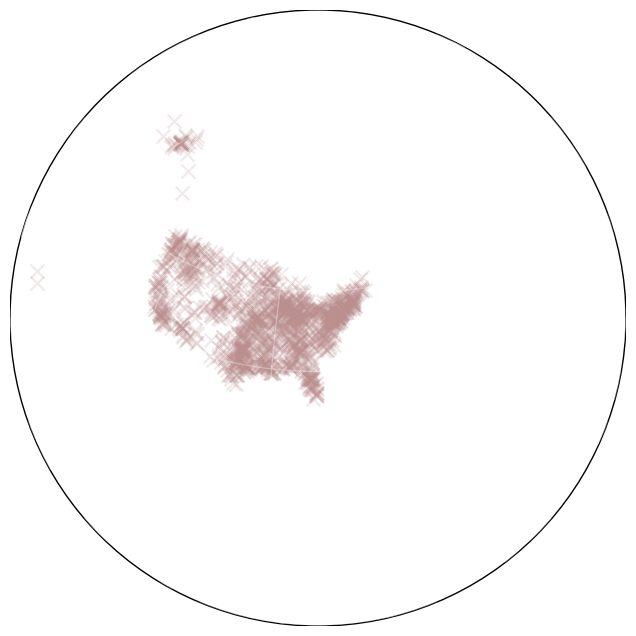

In [15]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=40, lon_0=-80)
draw_map(m);
#m.shadedrelief()

newdata_b = code1.iloc[0:1500, [3,4,5,6,8]]
lat_b = newdata_b['latitude_deg'].values
lon_b = newdata_b['longitude_deg'].values
#population = cities['population_total'].values
size_b = newdata_b['elevation_ft'].values
name_b = newdata_b['iso_country'].values

# scatter location
x,y=m(list(newdata_b['longitude_deg']),list(newdata_b['latitude_deg']))
m.scatter(x,y,100, marker='x', color='rosybrown', alpha=0.2)

In [18]:
result_b=result[result['iso_country']=='US']
# Extract the data we're interested in
lat = result['latitude_deg'].values
lon = result['longitude_deg'].values
fres = result['frequency_mhz'].values
area = result['iso_country'].values

Text(0.5, 1.0, 'The frequency_mhz by different color')

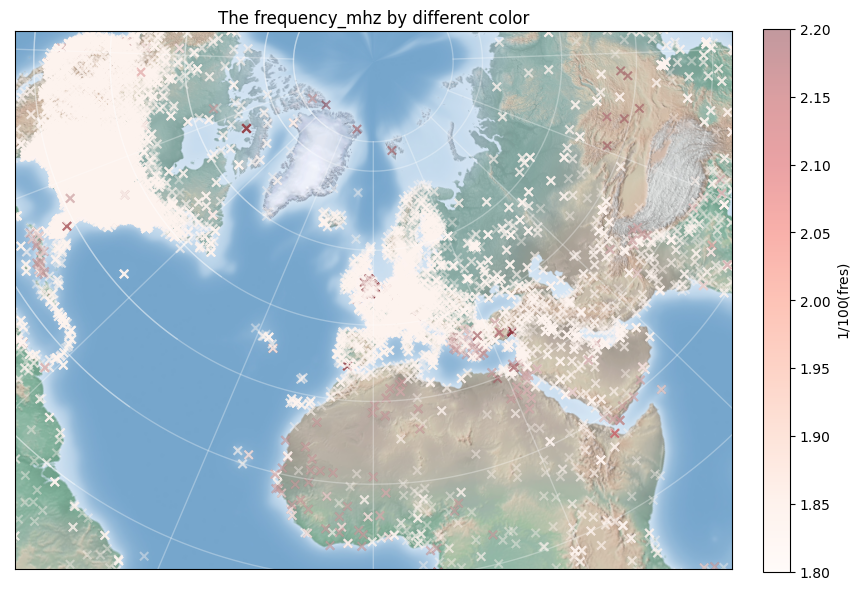

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#1. Draw the map background
fig = plt.figure(figsize=(10, 10),edgecolor='w')
m = Basemap(projection='lcc', resolution=None,
            lon_0=0,lat_0=50, lat_1=45,lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, c=fres/110, marker='x',cmap='Reds', alpha=0.4)

# 3. create colorbar and legend
plt.colorbar(fraction=0.035, pad=0.04,label=r'$1/100({\rm fres})$')
plt.clim(2, 2)
plt.title('The frequency_mhz by different color')